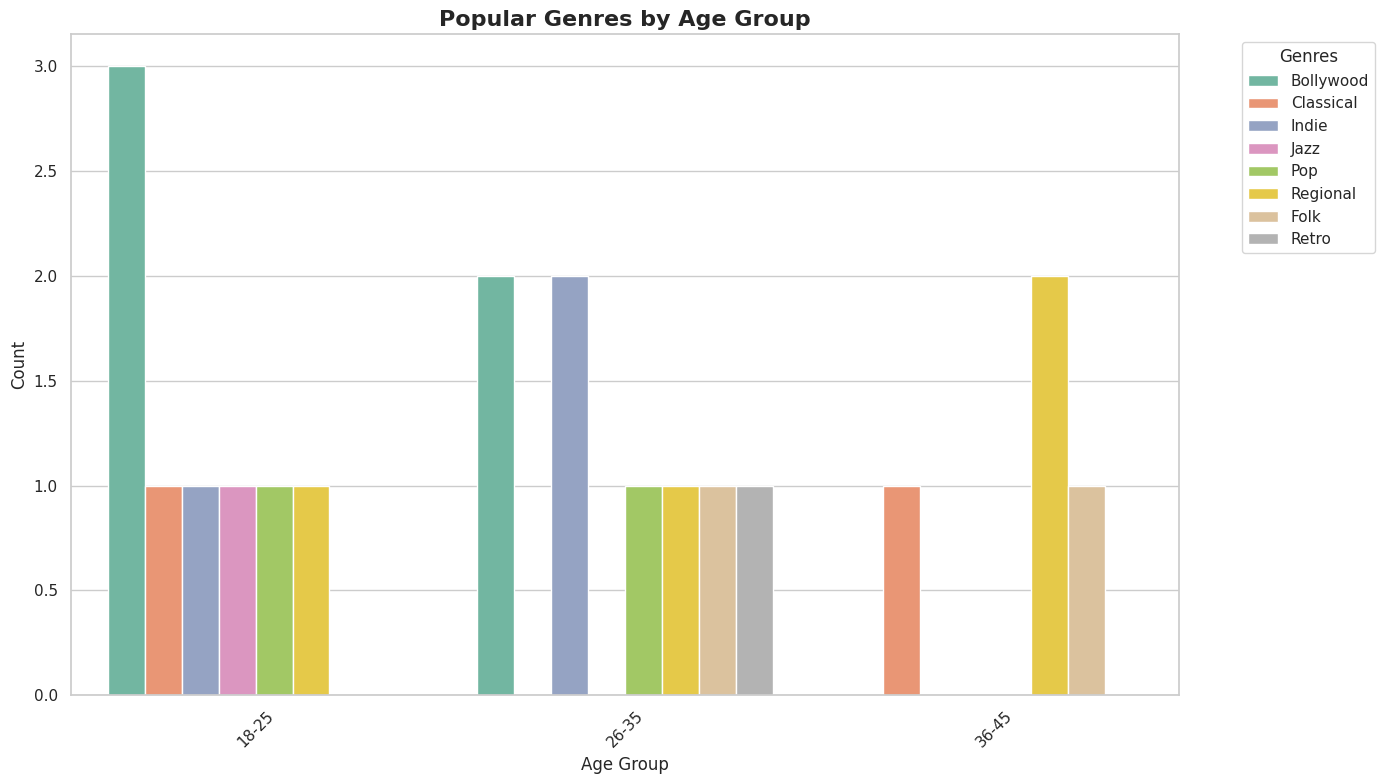

<ipython-input-7-2ed3de49c529>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=device_usage.index, y=device_usage.values, palette='coolwarm')


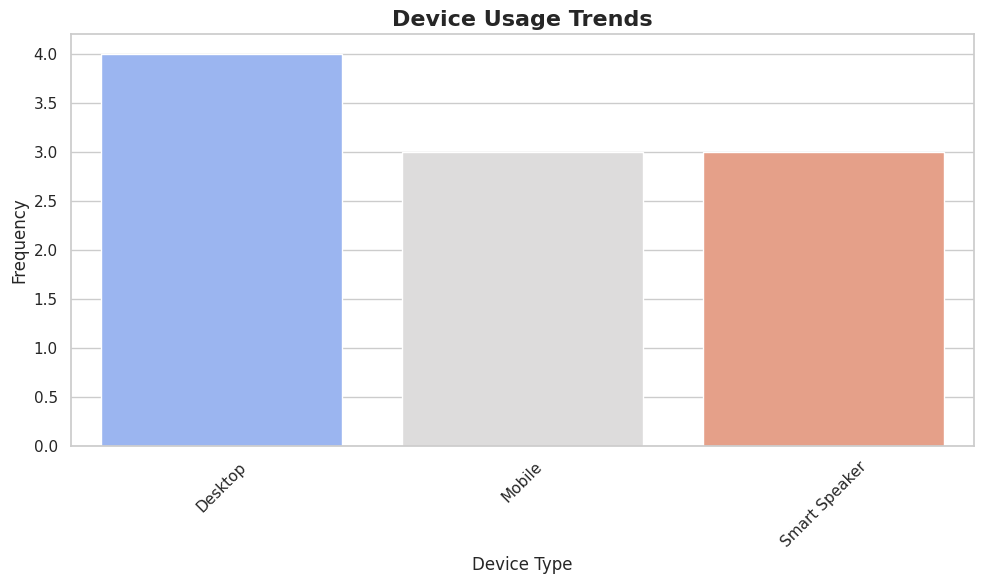

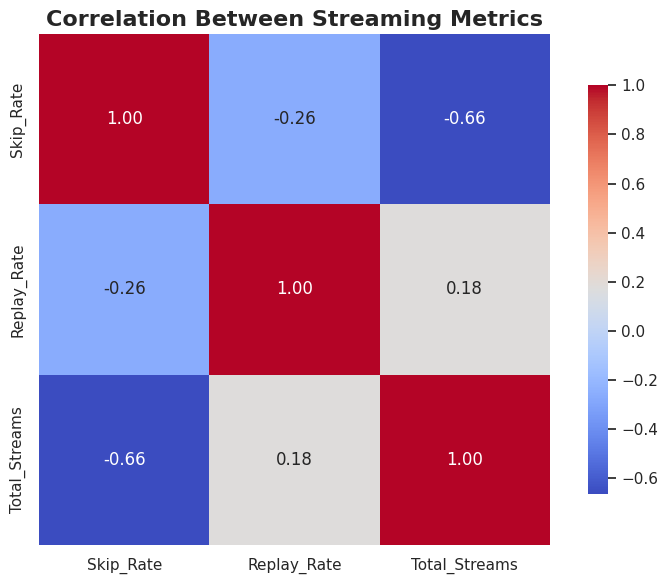

<ipython-input-7-2ed3de49c529>:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=listening_time.index, y=listening_time.values, palette='viridis')


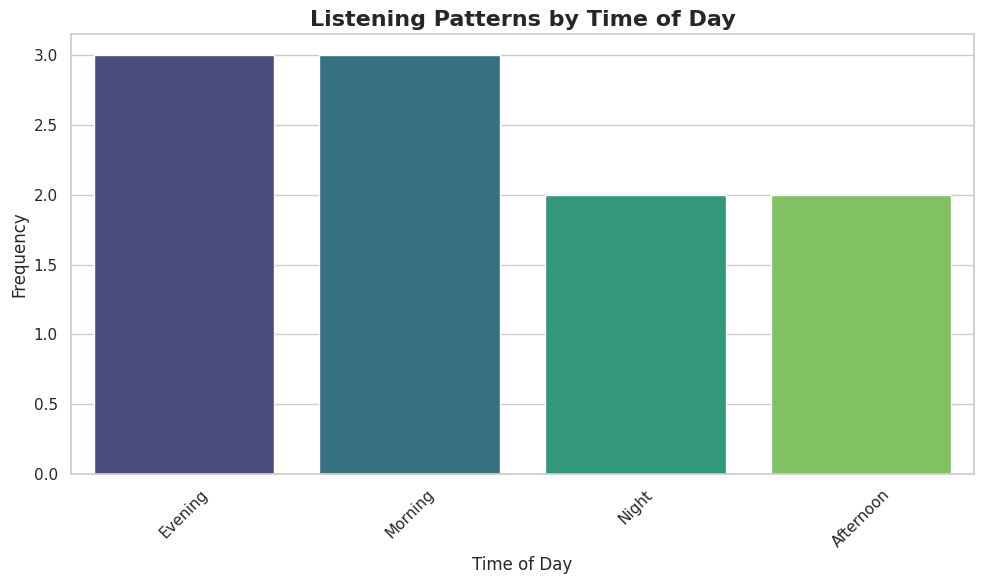

<ipython-input-7-2ed3de49c529>:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=music_data, x='Subscription_Type', y='Total_Streams', palette='Pastel1')


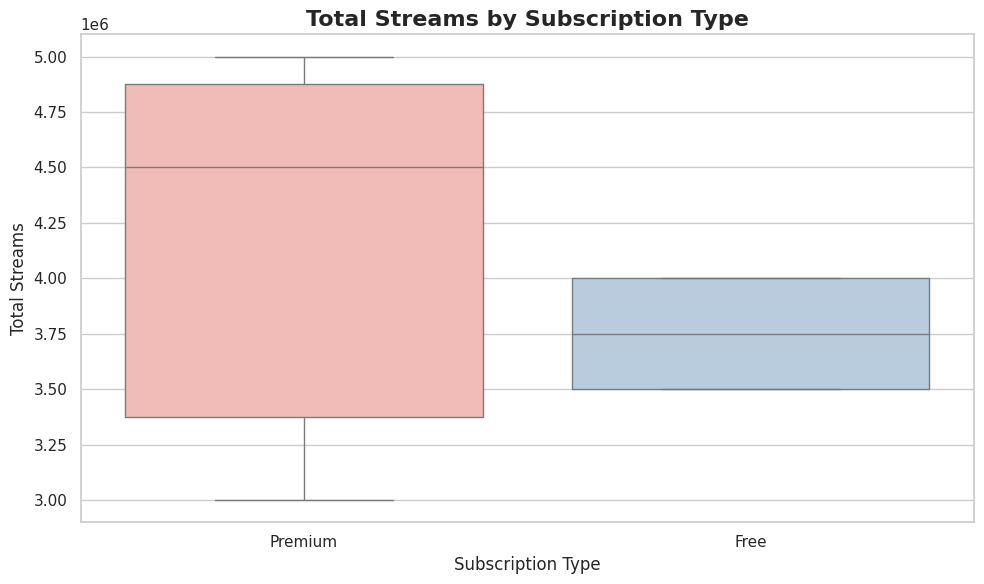

<ipython-input-7-2ed3de49c529>:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_artists.values, y=top_artists.index, palette='magma')


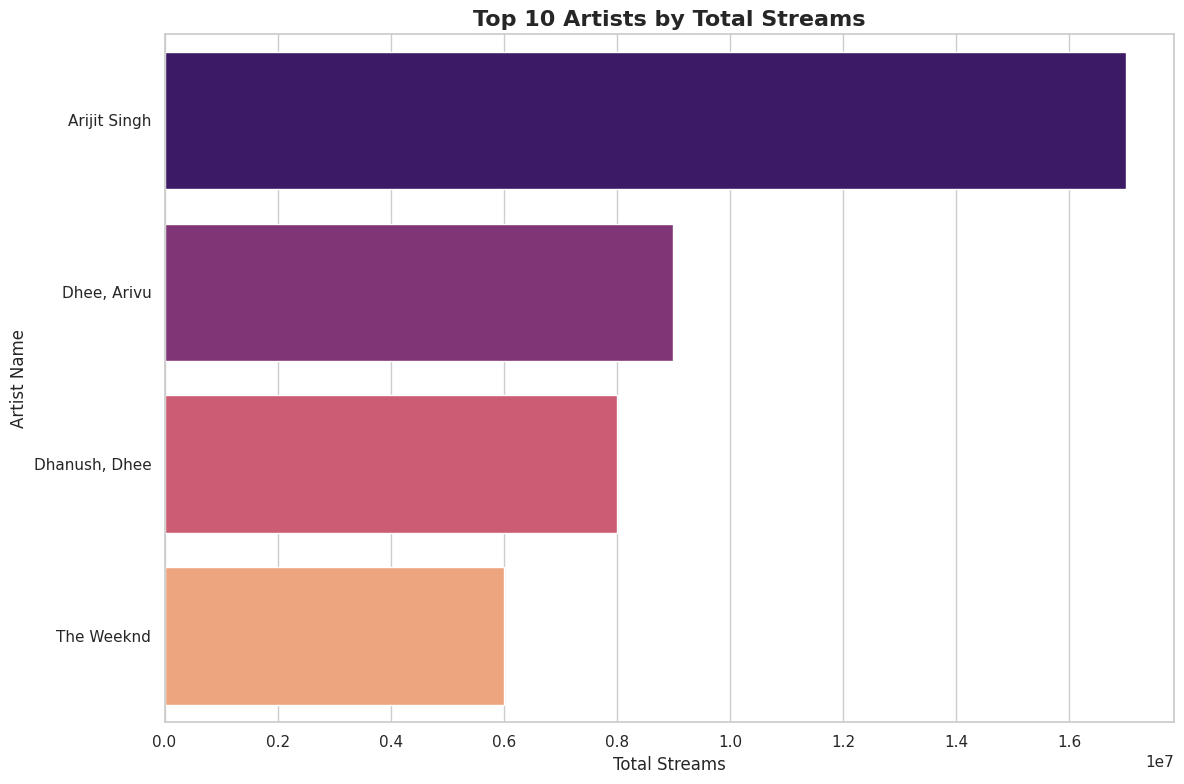

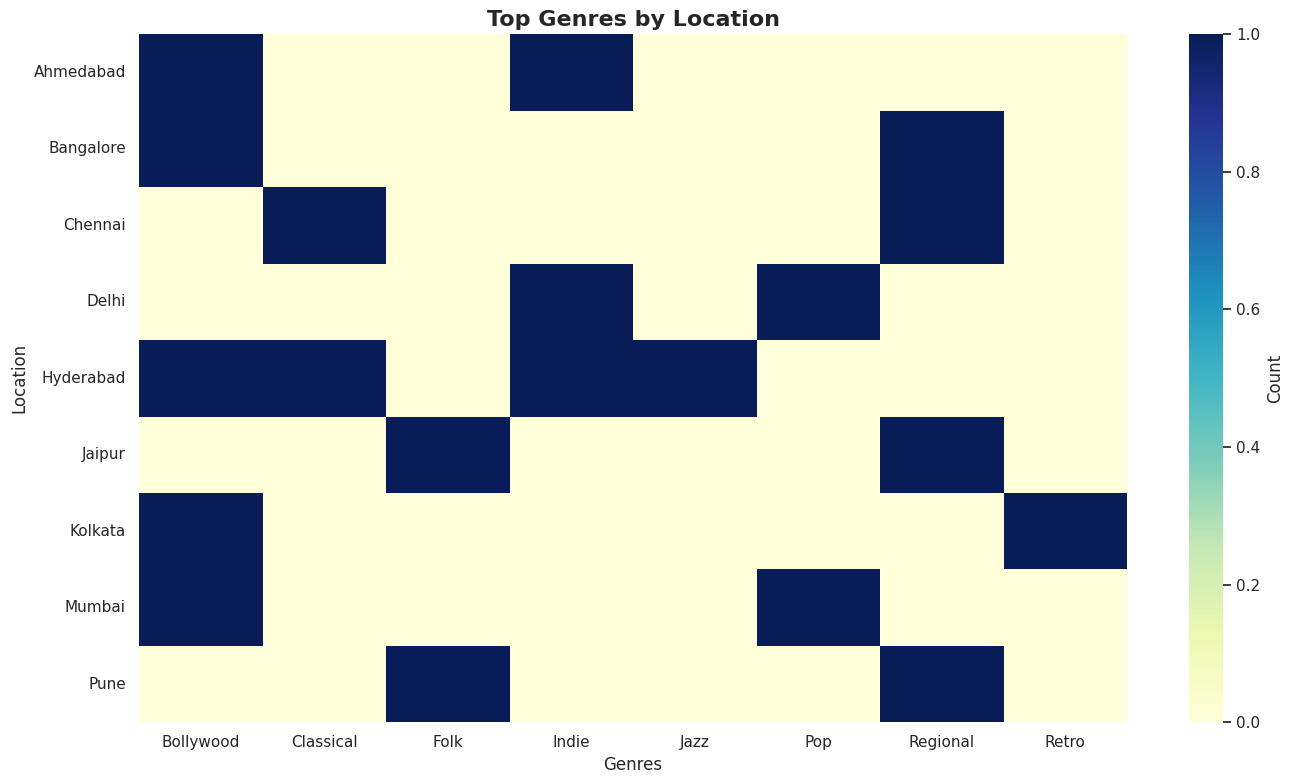

<ipython-input-7-2ed3de49c529>:100: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=music_data, x='Age_Group', y='Replay_Rate', palette='cubehelix')


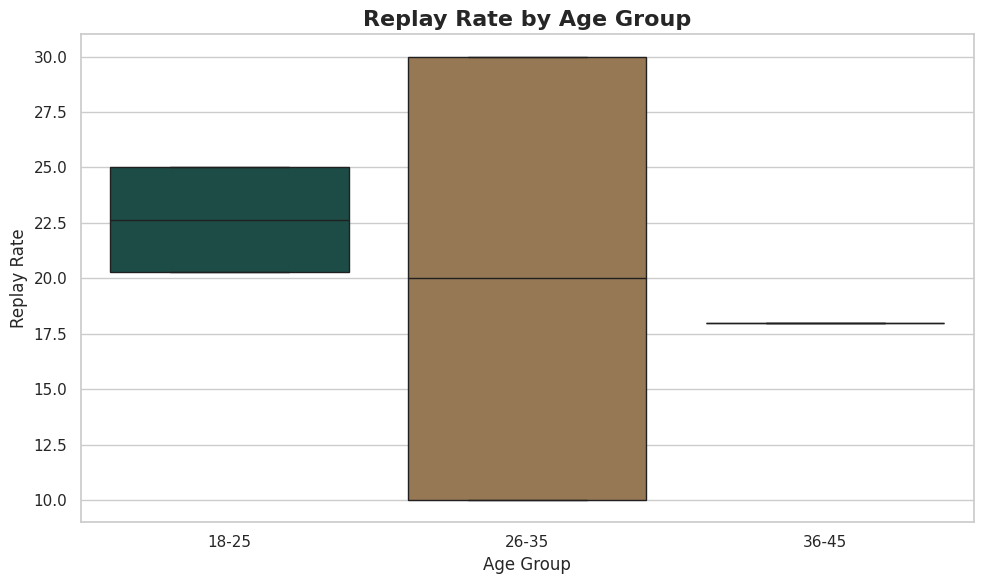

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = 'Music_Streaming_Data_India_2023_Expanded.csv'
music_data = pd.read_csv("/content/Music_Streaming_Data_India_2023_Expanded.csv")

# Data Preprocessing
music_data['Skip_Rate'] = pd.to_numeric(music_data['Skip_Rate'], errors='coerce')
music_data['Replay_Rate'] = pd.to_numeric(music_data['Replay_Rate'], errors='coerce')
music_data['Total_Streams'] = pd.to_numeric(music_data['Total_Streams'], errors='coerce')
music_data['Preferred_Genres_List'] = music_data['Preferred_Genres'].str.split(', ')
exploded_genres = music_data.explode('Preferred_Genres_List')

# Set style for plots
sns.set_theme(style="whitegrid")

# Visualization 1: Popular Genres by Age Group
top_genres_age = exploded_genres.groupby(['Age_Group', 'Preferred_Genres_List']).size().reset_index(name='Count')

plt.figure(figsize=(14, 8))
sns.barplot(data=top_genres_age, x='Age_Group', y='Count', hue='Preferred_Genres_List', palette='Set2')
plt.title("Popular Genres by Age Group", fontsize=16, weight='bold')
plt.ylabel("Count", fontsize=12)
plt.xlabel("Age Group", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Genres", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Visualization 2: Device Usage Trends
device_usage = music_data['Device_Usage'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=device_usage.index, y=device_usage.values, palette='coolwarm')
plt.title("Device Usage Trends", fontsize=16, weight='bold')
plt.ylabel("Frequency", fontsize=12)
plt.xlabel("Device Type", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualization 3: Correlation Heatmap
correlation_columns = ['Skip_Rate', 'Replay_Rate', 'Total_Streams']
correlation_data = music_data[correlation_columns].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_data, annot=True, cmap='coolwarm', fmt='.2f', square=True, cbar_kws={'shrink': 0.8})
plt.title("Correlation Between Streaming Metrics", fontsize=16, weight='bold')
plt.tight_layout()
plt.show()

# Visualization 4: Listening Patterns by Time
listening_time = music_data['Listening_Time_Pattern'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=listening_time.index, y=listening_time.values, palette='viridis')
plt.title("Listening Patterns by Time of Day", fontsize=16, weight='bold')
plt.ylabel("Frequency", fontsize=12)
plt.xlabel("Time of Day", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualization 5: Total Streams by Subscription Type
plt.figure(figsize=(10, 6))
sns.boxplot(data=music_data, x='Subscription_Type', y='Total_Streams', palette='Pastel1')
plt.title("Total Streams by Subscription Type", fontsize=16, weight='bold')
plt.ylabel("Total Streams", fontsize=12)
plt.xlabel("Subscription Type", fontsize=12)
plt.tight_layout()
plt.show()

# Visualization 6: Top Artists by Total Streams
top_artists = music_data.groupby('Artist_Name')['Total_Streams'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x=top_artists.values, y=top_artists.index, palette='magma')
plt.title("Top  Artists by Total Streams", fontsize=16, weight='bold')
plt.xlabel("Total Streams", fontsize=12)
plt.ylabel("Artist Name", fontsize=12)
plt.tight_layout()
plt.show()

# Visualization 7: Top Genres in Locations
top_genres_location = exploded_genres.groupby(['Location', 'Preferred_Genres_List']).size().reset_index(name='Count')
pivot_data = top_genres_location.pivot(index='Location', columns='Preferred_Genres_List', values='Count').fillna(0)

plt.figure(figsize=(14, 8))
sns.heatmap(pivot_data, cmap='YlGnBu', annot=False, cbar_kws={'label': 'Count'})
plt.title("Top Genres by Location", fontsize=16, weight='bold')
plt.xlabel("Genres", fontsize=12)
plt.ylabel("Location", fontsize=12)
plt.tight_layout()
plt.show()

# Visualization 8: Replay Rate by Age Group
plt.figure(figsize=(10, 6))
sns.boxplot(data=music_data, x='Age_Group', y='Replay_Rate', palette='cubehelix')
plt.title("Replay Rate by Age Group", fontsize=16, weight='bold')
plt.ylabel("Replay Rate", fontsize=12)
plt.xlabel("Age Group", fontsize=12)
plt.tight_layout()
plt.show()